# 1. Dataset loading

In [ ]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Set your Kaggle API credentials using environment variables
os.environ["KAGGLE_USERNAME"] = "b20cs048"
os.environ["KAGGLE_KEY"] = "24a550be5e552e966e4d4b6a2a6bfa51"

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Download the dataset
dataset_name = "andradaolteanu/gtzan-dataset-music-genre-classification"
api.dataset_download_files(dataset_name, path="./data", unzip=True)

# 2. Importing Libraries and Setting Up

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import librosa
import librosa.display
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

warnings.filterwarnings('ignore')
import os

# Define general paths
general_path = '/content/data/Data'
print(list(os.listdir(f'{general_path}/genres_original/')))


['hiphop', 'disco', 'rock', 'classical', 'metal', 'jazz', 'blues', 'country', 'reggae', 'pop']


# 3. Loading and Visualization

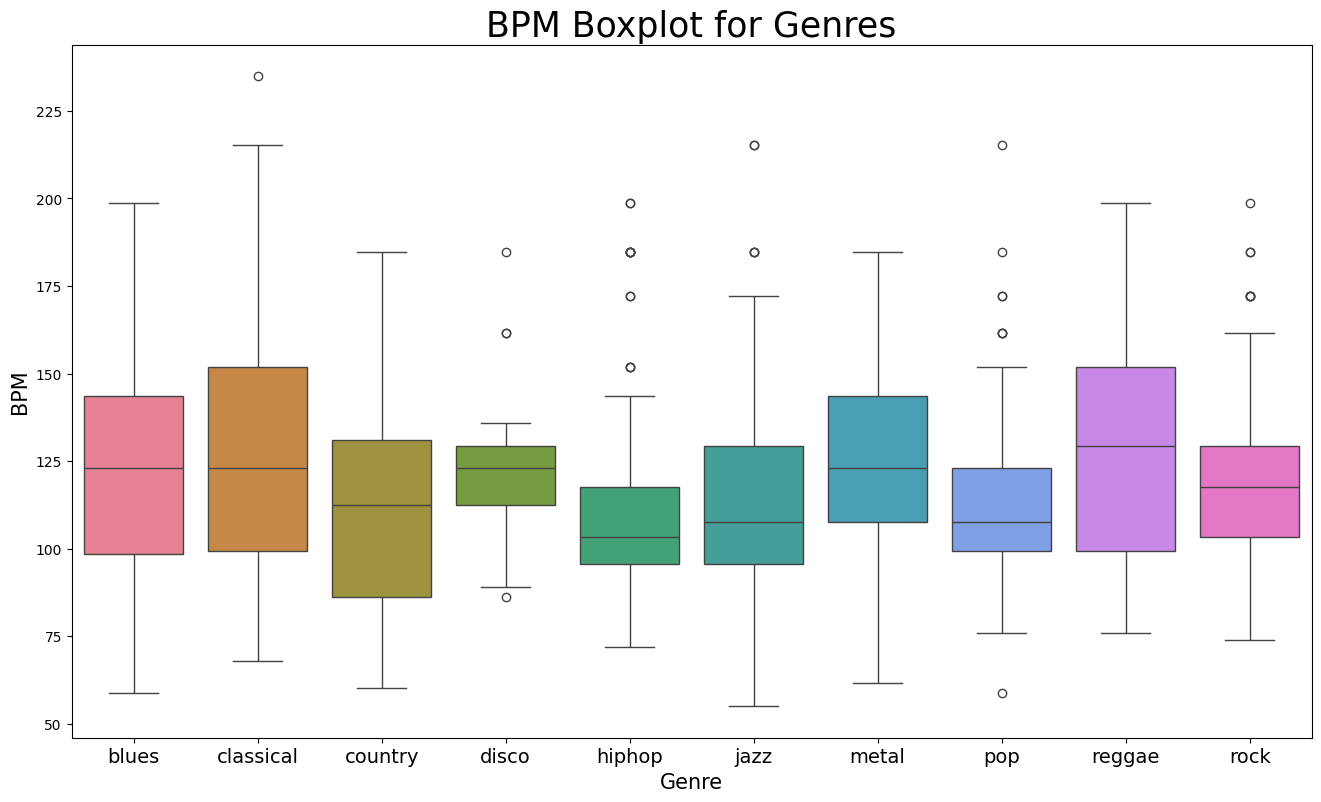

In [ ]:
# Load features data
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
x = data[["label", "tempo"]]

# Visualize BPM Boxplot for Genres
plt.figure(figsize=(16, 9))
sns.boxplot(x="label", y="tempo", data=x, palette='husl')
plt.title('BPM Boxplot for Genres', fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("BPM", fontsize=15)
plt.savefig("BPM Boxplot.jpg")


# 4. Model Training and Evaluation

In [ ]:
# Model Implementation
data = pd.read_csv(f'{general_path}/features_3_sec.csv').iloc[:, 1:]
y = data['label']
X = data.drop(columns=['label'])

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Naive Bayes Accuracy: 0.5230230230230231


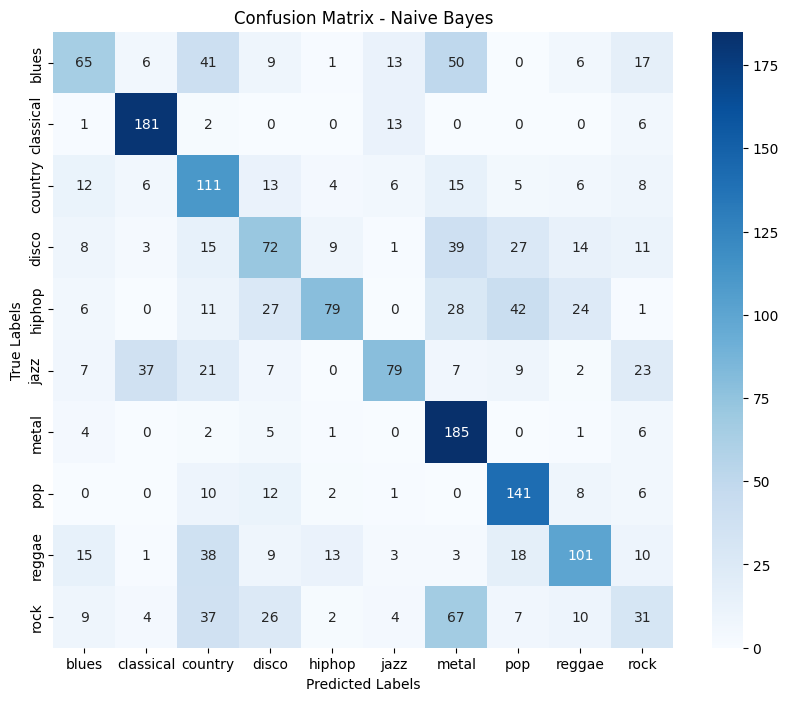

Stochastic Gradient Descent Accuracy: 0.6591591591591591


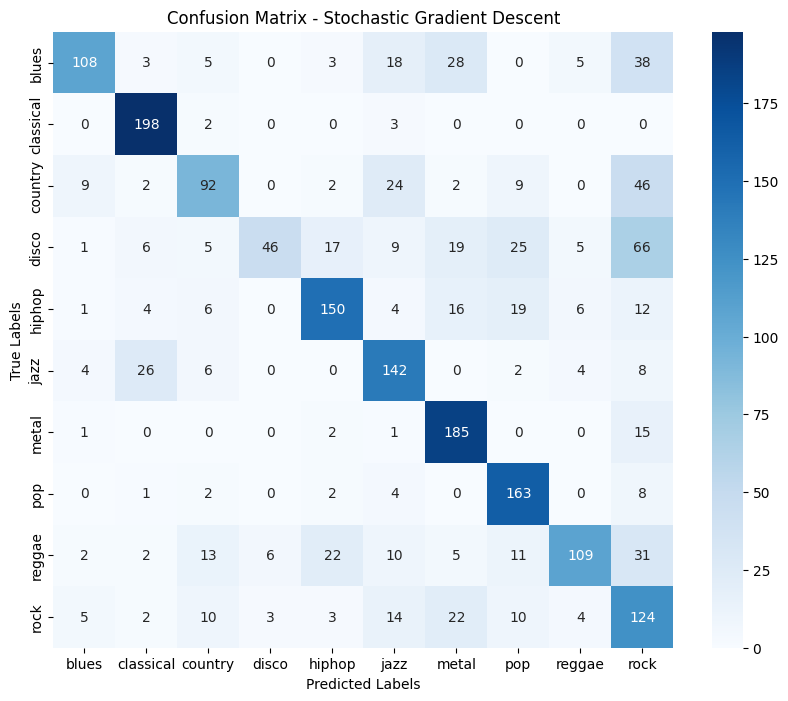

KNN Accuracy: 0.8313313313313313


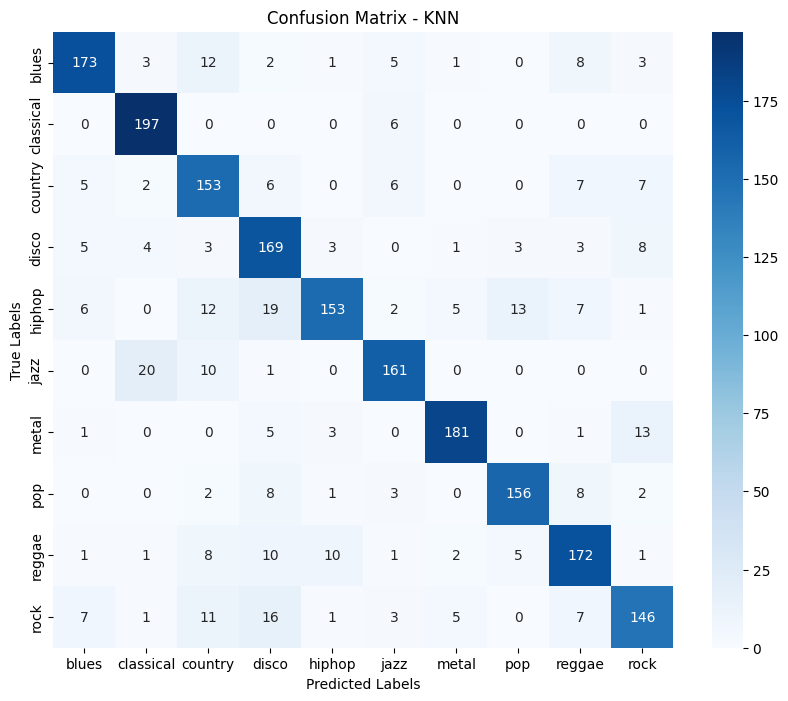

Decision Trees Accuracy: 0.6616616616616616


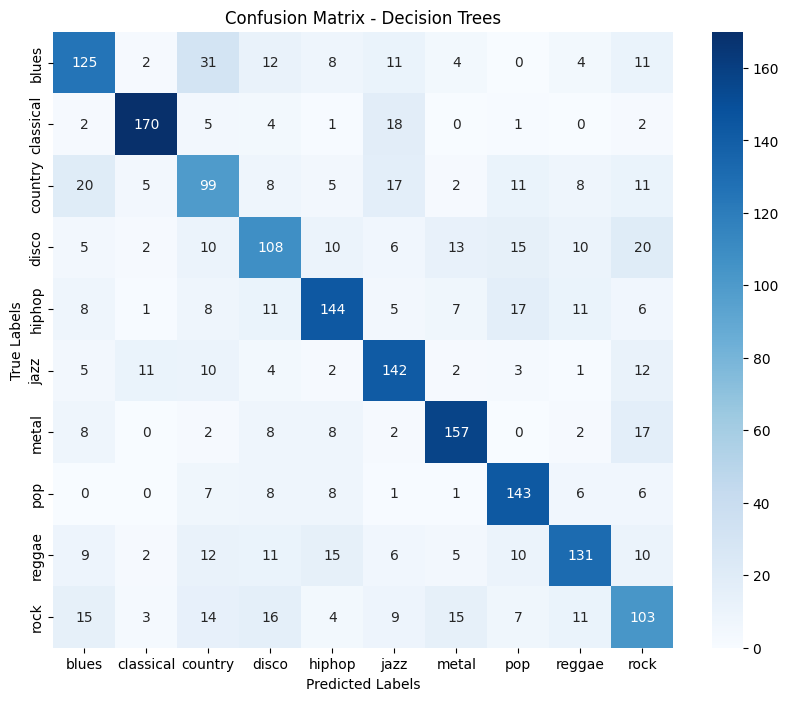

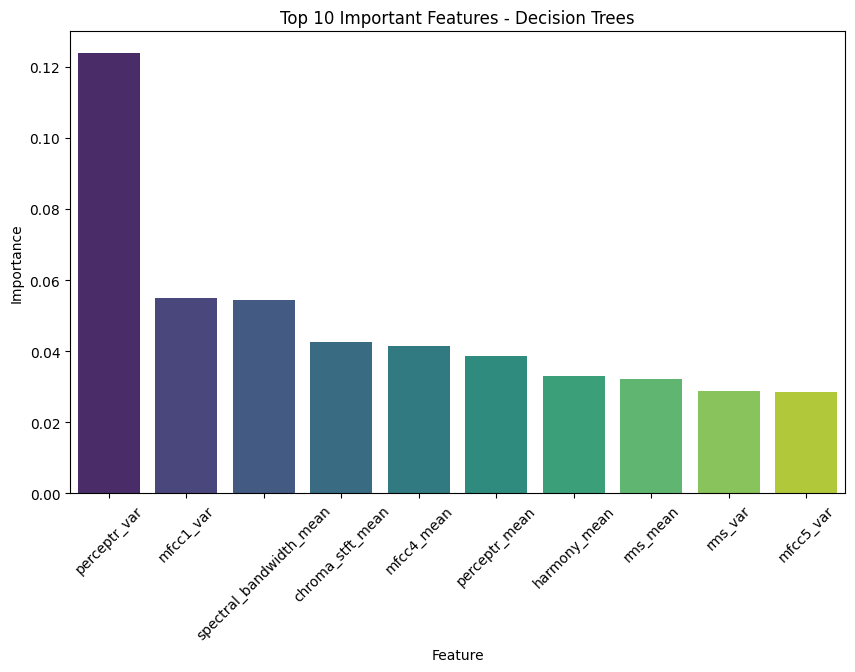

Random Forest Accuracy: 0.8168168168168168


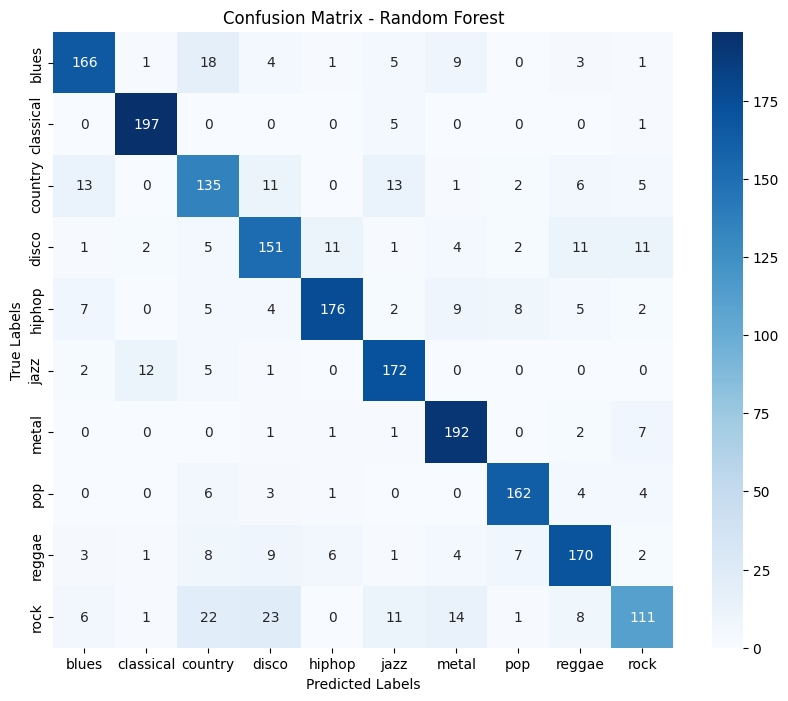

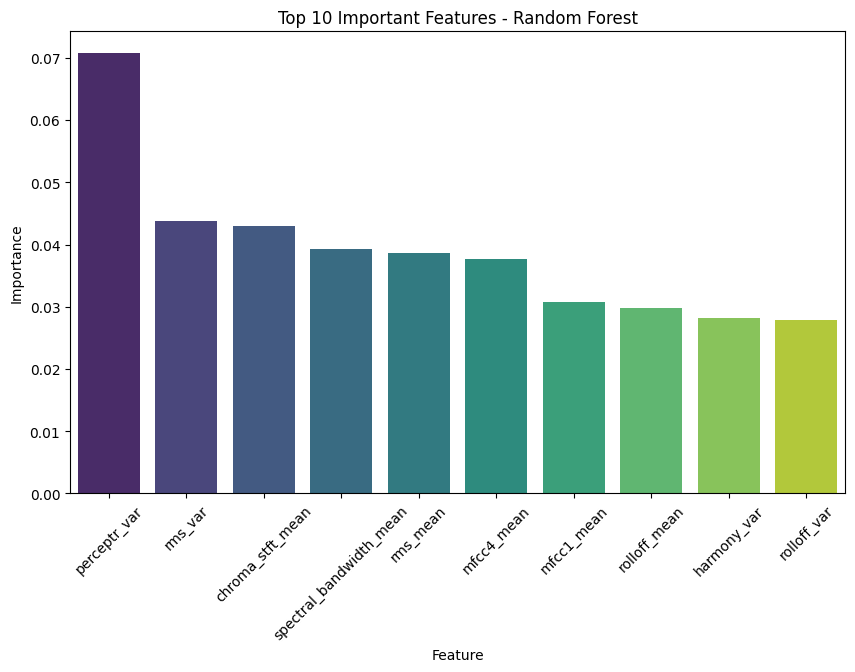

Support Vector Machine Accuracy: 0.7587587587587588


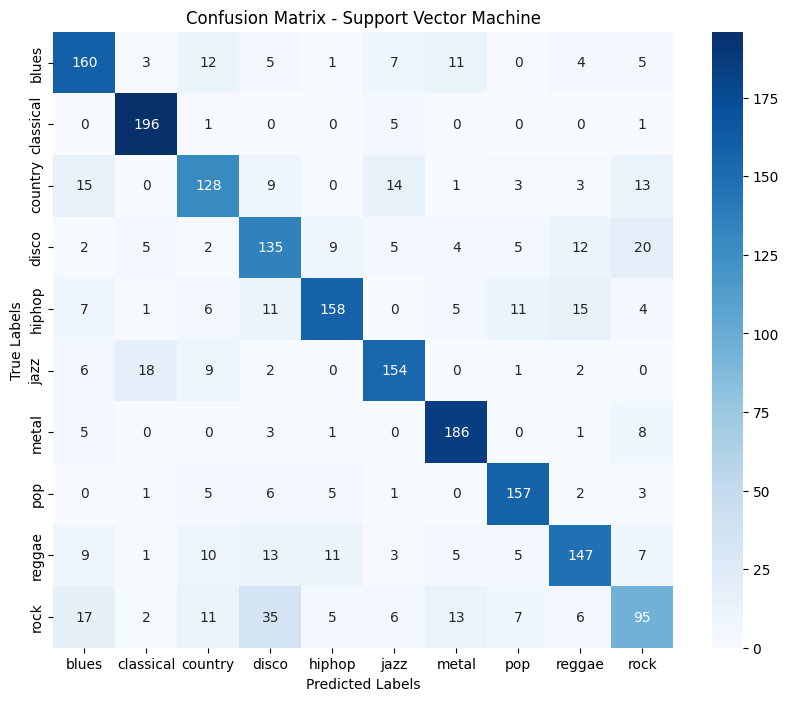

In [ ]:
# Define and assess models
models = {
    "Naive Bayes": GaussianNB(),
    "Stochastic Gradient Descent": SGDClassifier(max_iter=5000, random_state=0),
    "KNN": KNeighborsClassifier(n_neighbors=19),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0),
    "Support Vector Machine": SVC(decision_function_shape="ovo")
}

# Initialize lists to store model accuracies
model_names = []
accuracies = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc}")
    model_names.append(name)
    accuracies.append(acc)

        # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

        # Feature Importance (for tree-based models)
    if name in ["Decision Trees", "Random Forest"]:
        feature_importance = model.feature_importances_
        sorted_indices = np.argsort(feature_importance)[::-1]
        top_features = X.columns[sorted_indices][:10]  # Top 10 features
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_features, y=feature_importance[sorted_indices][:10], palette="viridis")
        plt.title(f"Top 10 Important Features - {name}")
        plt.xlabel("Feature")
        plt.ylabel("Importance")
        plt.xticks(rotation=45)
        plt.show()

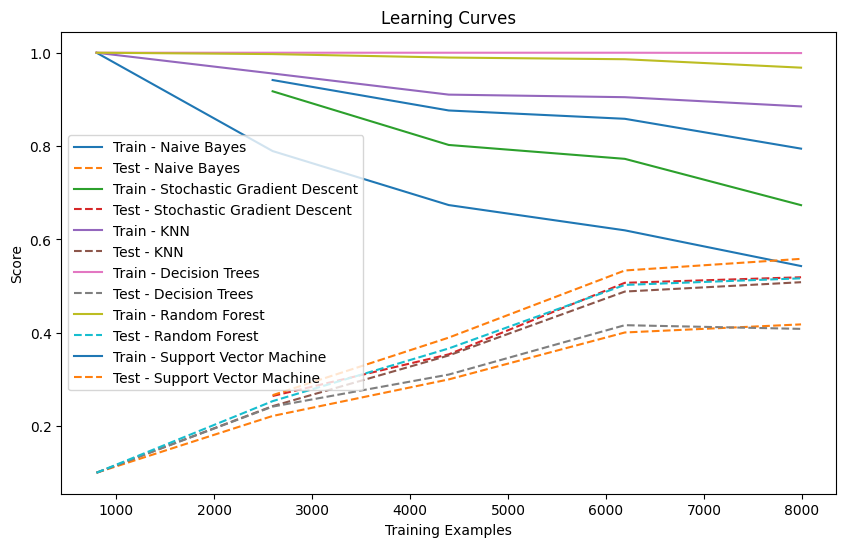

In [ ]:
from sklearn.model_selection import learning_curve

plt.figure(figsize=(10, 6))
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=5, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, label=f"Train - {name}")
    plt.plot(train_sizes, test_scores_mean, label=f"Test - {name}", linestyle='dashed')

plt.title("Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend()
plt.show()

# 5. Model Comparison

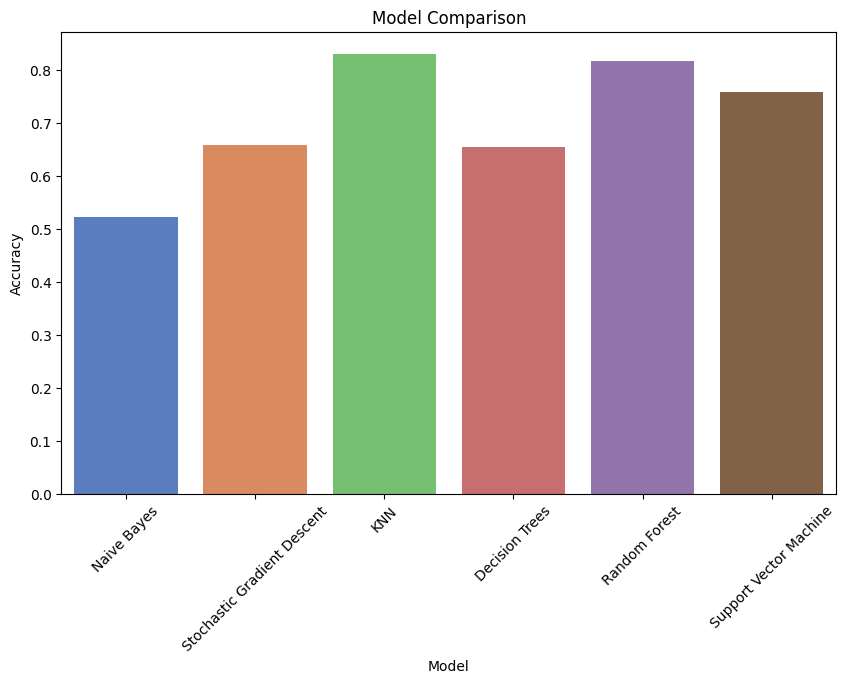

In [ ]:
# Model Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="muted")
plt.title("Model Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


# 6. Class Distribution Visualization

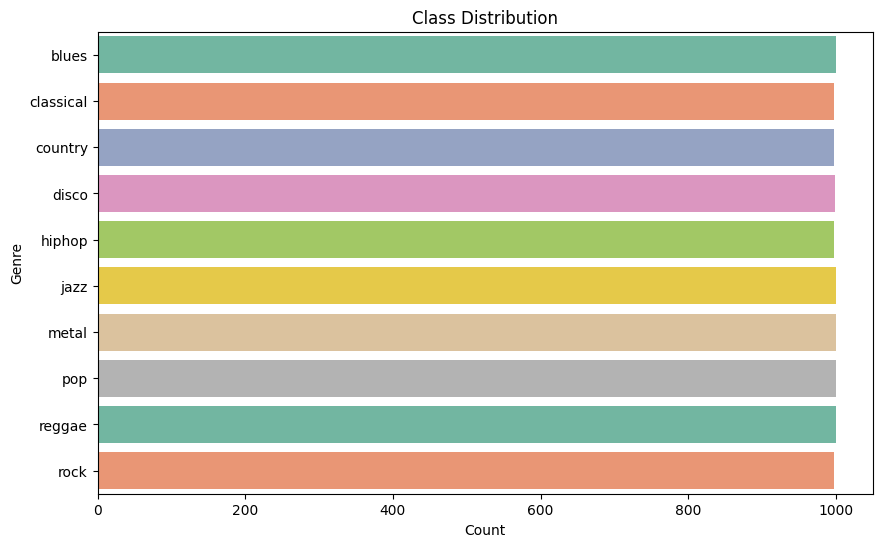

In [ ]:
# Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y, palette="Set2")
plt.title("Class Distribution")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


# 7. Error Analysis

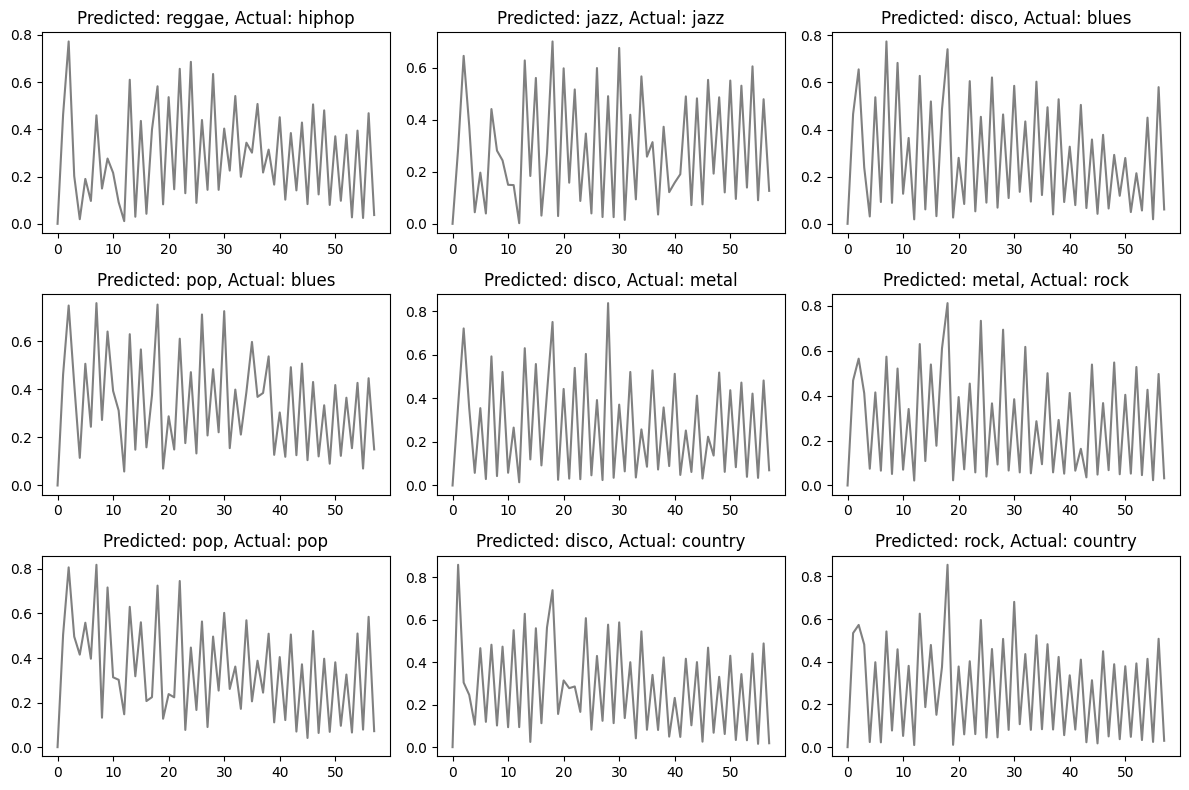

In [ ]:
# Error Analysis (for Random Forest)
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
errors_rf = X_test[y_pred_rf != y_test]

# Visualize error samples
plt.figure(figsize=(12, 8))
for i in range(min(9, errors_rf.shape[0])):
    plt.subplot(3, 3, i + 1)
    plt.plot(errors_rf[i], color='gray')
    plt.title(f'Predicted: {rf_model.predict(errors_rf[i].reshape(1, -1))[0]}, Actual: {y_test.iloc[i]}')
plt.tight_layout()
plt.show()
